# Decision Tree Problem Involving Numerical Features

In this section, we'll go through a decision tree problem involving numerical features, illustrating the process in both mathematical form and a step-by-step example.

### Problem:
We have a dataset with two numerical features, \( X_1 \) and \( X_2 \), and a binary target variable \( y \), where:

- \( X_1 \) and \( X_2 \) represent features (predictors),
- \( y \) represents the target class (either 0 or 1).

We aim to use a decision tree to classify \( y \) based on \( X_1 \) and \( X_2 \).

### Dataset Example (Numerical Values):

| \( X_1 \) | \( X_2 \) | \( y \) |
|-----------|-----------|---------|
| 2.5       | 1.3       | 0       |
| 3.1       | 1.7       | 0       |
| 4.2       | 3.5       | 1       |
| 1.5       | 0.9       | 0       |
| 3.7       | 2.2       | 1       |
| 2.8       | 1.5       | 0       |
| 4.5       | 3.8       | 1       |

### Step 1: Define the Gini Impurity

For a decision tree, at each split, we want to minimize the Gini impurity. The formula for Gini impurity at node \( t \) is given by:

\[
G(t) = 1 - \sum_{i=1}^{C} p_i^2
\]

Where:

- \( C \) is the number of classes (in our case, \( C = 2 \) since it’s binary classification),
- \( p_i \) is the proportion of samples belonging to class \( i \) at node \( t \).

For binary classification, this simplifies to:

\[
G(t) = 1 - (p_0^2 + p_1^2)
\]

### Step 2: Selecting a Split Point

Suppose we consider splitting on \( X_1 \). We look for the value of \( X_1 \) that minimizes the Gini impurity.

Let’s say we choose \( X_1 = 3.0 \) as the split point:

#### Left Subset (\( X_1 \leq 3.0 \)):

| \( X_1 \) | \( X_2 \) | \( y \) |
|-----------|-----------|---------|
| 2.5       | 1.3       | 0       |
| 3.1       | 1.7       | 0       |
| 1.5       | 0.9       | 0       |
| 2.8       | 1.5       | 0       |

All samples belong to class 0, so:

\[
G(\text{left}) = 1 - (1^2 + 0^2) = 0
\]

#### Right Subset (\( X_1 > 3.0 \)):

| \( X_1 \) | \( X_2 \) | \( y \) |
|-----------|-----------|---------|
| 4.2       | 3.5       | 1       |
| 3.7       | 2.2       | 1       |
| 4.5       | 3.8       | 1       |

All samples belong to class 1, so:

\[
G(\text{right}) = 1 - (0^2 + 1^2) = 0
\]

### Step 3: Weighted Gini Impurity

The weighted Gini impurity for the split at \( X_1 = 3.0 \) is the average impurity across the left and right subsets, weighted by the number of samples in each subset.

\[
G_{\text{split}} = \frac{4}{7} \cdot G(\text{left}) + \frac{3}{7} \cdot G(\text{right}) = \frac{4}{7} \cdot 0 + \frac{3}{7} \cdot 0 = 0
\]

Thus, this split is perfect in this case since it results in zero Gini impurity, fully separating the classes.

### Step 4: Decision Rule

At this point, our decision tree can create the following decision rule based on the feature \( X_1 \):

- If \( X_1 \leq 3.0 \), predict class \( 0 \),
- If \( X_1 > 3.0 \), predict class \( 1 \).

### Step 5: Evaluation

Once the tree is trained, it can be evaluated by predicting \( y \) for unseen data and calculating evaluation metrics like accuracy, precision, recall, etc.

For example, using new samples \( (X_1, X_2) = (2.6, 1.4) \), the model predicts:

- \( X_1 = 2.6 \): Since \( 2.6 \leq 3.0 \), predict \( y = 0 \).

### Generalization to More Features

If we have more features (e.g., \( X_1, X_2, X_3 \)), the tree will check each feature at every split, attempting to minimize Gini impurity or another criterion like entropy. At each decision node, the tree finds the best splitting point by examining all available features and values. The process continues recursively until the stopping condition is met (e.g., max depth).


In [1]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
# Step 2: Load the Dataset (assuming you have a CSV)
data = {
    'X1': [2.5, 3.1, 4.2, 1.5, 3.7, 2.8, 4.5],
    'X2': [1.3, 1.7, 3.5, 0.9, 2.2, 1.5, 3.8],
    'y':  [0, 0, 1, 0, 1, 0, 1]
}

# Convert to DataFrame
df = pd.DataFrame(data)
print(df)


    X1   X2  y
0  2.5  1.3  0
1  3.1  1.7  0
2  4.2  3.5  1
3  1.5  0.9  0
4  3.7  2.2  1
5  2.8  1.5  0
6  4.5  3.8  1


In [4]:
# Step 3: Preprocess the Data
# Separating features and target
X = df[['X1', 'X2']]  # Replace 'X1', 'X2' with your actual feature column names
y = df['y']  # Replace 'target' with your actual target column name


In [5]:
# Step 4: Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Step 5: Train a Decision Tree Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
# Step 6: Model Evaluation
y_pred = clf.predict(X_test)


In [8]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.3333333333333333
Confusion Matrix:
[[1 2]
 [0 0]]


In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

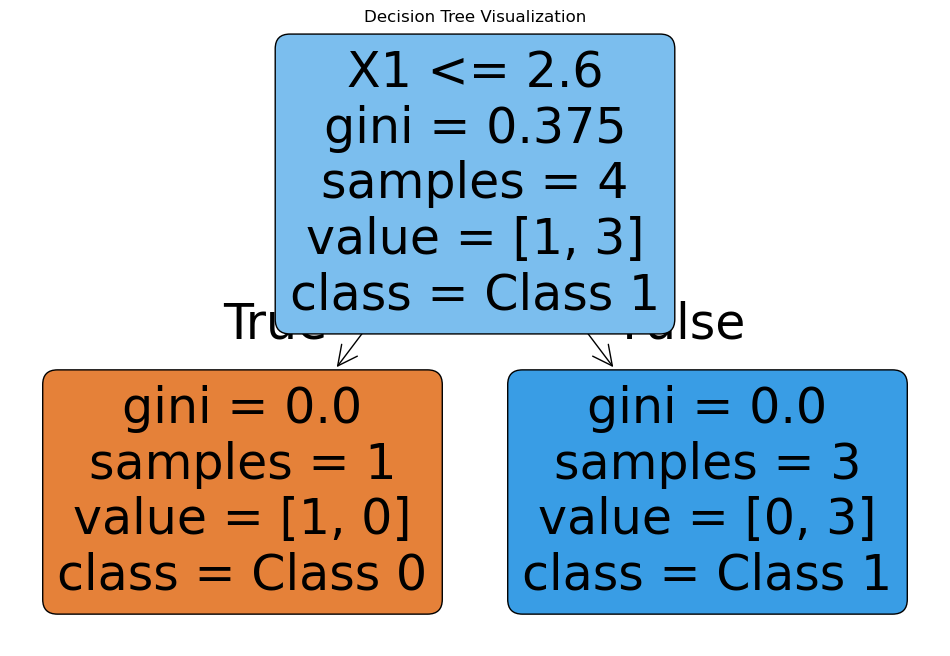

In [11]:
# Step 7: Visualizing the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=['X1', 'X2'], class_names=['Class 0', 'Class 1'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


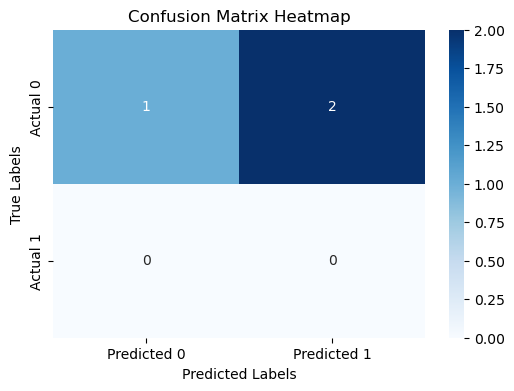

In [13]:
# Step 8: Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

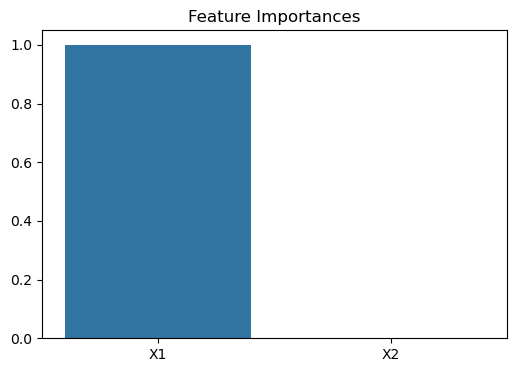

In [14]:
# Step 9: Feature Importance
feature_importances = clf.feature_importances_
plt.figure(figsize=(6,4))
sns.barplot(x=['X1', 'X2'], y=feature_importances)
plt.title('Feature Importances')
plt.show()

In [15]:
print("The End")

The End
